In [1]:
#############################################################
# Compile `main.cu` to `file.exe`
# Commented out because we don't want to run it all the time
#############################################################
!nvcc -w functions.cu main.cu -o file

functions.cu
tmpxft_00004f34_00000000-10_functions.cudafe1.cpp
main.cu
tmpxft_00004f34_00000000-14_main.cudafe1.cpp
   Creating library file.lib and object file.exp


In [14]:
#############################################################
# Load python dependencies
# If package cannot be resolved from pylance, reload the interpreter
#############################################################
import numpy as np
import matplotlib.pyplot as plt
import utils

# Generate detuning
todo: distribution functions
read into detuning.dat

In [9]:
#############################################################
# Generate and write detuning data to file
#############################################################
# Write 1D numpy array to file
detuning_values_1d = utils.gen_same_pop(0, 50, 2000)[1]
print("Detuning data:", detuning_values_1d)
np.savetxt("Detuning.dat", detuning_values_1d, delimiter="\t")

# Example: write 2D numpy array to file
# values_2d = np.array([
#     [10.0, 20.0, 40.0],
#     [10.0, 20.0, 50.0],
#     [10.0, 20.0, 60.0]
# ])
# np.savetxt("values_2d.dat", values_2d, delimiter="\t")

Detuning data: [2000.         1902.36085256 1805.08690044 1708.5392463  1613.07088384
 1519.02283215 1426.72049127 1336.47028359 1248.55663853 1163.23936928
 1080.75148046 1001.2974353   925.05189969  852.15896948  782.73187662
  716.85315937  654.57527217  595.92160247  540.88785455  489.44375458
  441.53502669  397.08558737  355.99990376  318.16546203  283.4552933
  251.73050724  222.84278755  196.6368077   172.95253099  151.6273644
  132.49814182  115.40291802  100.18256089   86.68213474   74.75207293
   64.24914242   55.03720725   46.9878012    39.98052268   33.90326703
   28.65231302   24.13228106   20.2559811    16.94416791   14.1252212
   11.73476668    9.71525354    8.01550192    6.59023296    5.39959213]


# Run simulation

To run a single system, use terminal: file.exe {input_param}

"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 60000, "handle": "60000"

## Suggested file naming convention:
k{num_ens}N{order of magnitude of n_total}_{theta_phi}_{other params}

E.g., k5N5_1_0_kappa160

The below block of code is useful for running multiple jobs

In [2]:

#############################################################
# Run multiple jobs
#############################################################
# List of arguments for each run
runs = [
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 60000, "handle": "60000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 70000, "handle": "70000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 80000, "handle": "80000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 90000, "handle": "90000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 100000, "handle": "100000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 110000, "handle": "110000"}
]

for arg in runs:
    # Prepare run arguments
    num_ens = arg['num_ens']
    n_total = arg['n_total']
    theta_0 = arg['theta_0']
    phi_0 = arg['phi_0']
    coup_a_0 = arg['coup_a_0']
    gamma_a_0 = arg['gamma_a_0']
    chi_a_0 = arg['chi_a_0']
    kappa_c_0 = arg['kappa_c_0']
    t_max = arg['t_max']
    t_num = arg['t_num']
    handle = arg['handle']
    
    # Run simulation with muted stdout stderr, 1st line for WIN, 2nd for UNIX. To view progress, use terminal instead
    # !file.exe {num_ens} {n_total} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num} {handle}  >nul 2>&1
    # !file.exe {num_ens} {n_total} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num} {handle}  > /dev/null 2>&1
    
    # Construct the result data filenames based on the `handle`
    result_sz_filename = f"Result_Sz_{handle}.dat"
    result_coherences_filename = f"Result_coherences_real_{handle}.dat"
    result_photon_filename = f"Result_photon_{handle}.dat"
    result_time_filename = f"Result_time_{handle}.dat"
    
    result_sz = np.loadtxt(result_sz_filename, dtype=np.longdouble)
    result_time = np.loadtxt(result_time_filename, dtype=np.longdouble)
    detuning = np.loadtxt("Detuning.dat", dtype=np.longdouble)
    
    print(detuning)
    print(result_time)
    
    res = np.rot90(result_sz)
    print(result_sz)
    print(res)
        

NameError: name 'np' is not defined

# Analyze & Plot
todo:  import util functions return predict Td
write block to plot with Td and found Td

In [35]:
#############################################################
# Read in the results file
# Returns: 
#         [0]: time steps
#         [1]: sz
#         [2]: coherence
#         [3]: photons
#############################################################
results = utils.read_results("k50N5SS") # Input: file handle

Text(0, 0.5, '$\\langle a^\\dagger a\\rangle$')

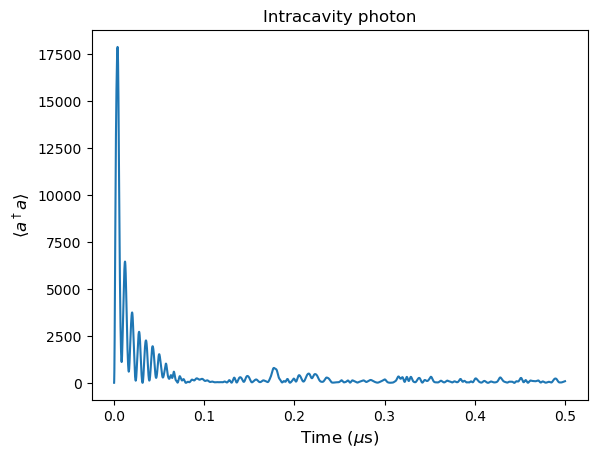

In [36]:
#############################################################
# Plots intracavity field
#############################################################
plt.plot(results[0], results[3])
plt.title("Intracavity photon", fontsize=12)
plt.xlabel(r"Time ($\mu$s)", fontsize=12)
plt.ylabel(r"$\langle a^\dagger a\rangle$", fontsize=12)

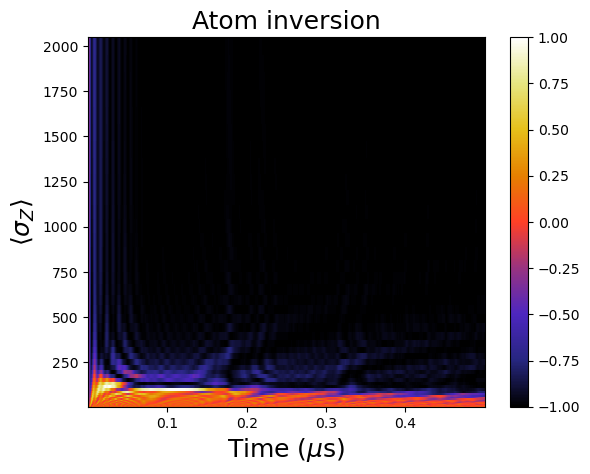

In [37]:
utils.plot_heat(results[0],detuning_values_1d, np.rot90(results[1]), -1.0,1.0, 
                "Atom inversion", "Time ($\mu$s)", "$\langle\sigma_Z\\rangle$")

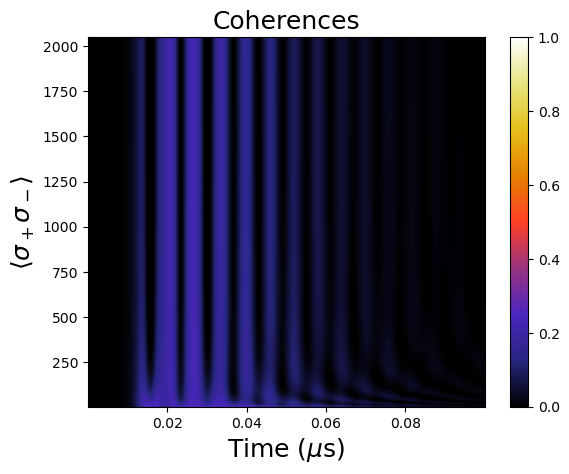

In [30]:
utils.plot_heat(results[0],detuning_values_1d, np.rot90(results[2]), 0.0,1.0, 
                "Coherences", "Time ($\mu$s)", "$\langle\sigma_+\sigma_-\\rangle$")